# Lab 02: Khám phá dữ liệu, tiền xử lý, và phân tích thống kê

**Thông tin liên lạc HDTH**

Lab Instructor: Lê Nhựt Nam (CN.)

Email: lenam.fithcmus@gmail.com

**Thông tin sinh viên**

Họ tên sinh viên: Nguyễn Tấn Sơn

Mã số sinh viên: 20120565

## Cách làm bài và nộp bài

&#9889; Bạn lưu ý là mình sẽ dùng chương trình hỗ trợ chấm bài nên bạn cần phải tuân thủ chính xác qui định mà mình đặt ra, nếu không rõ thì hỏi, chứ không nên tự tiện làm theo ý của cá nhân.

### Cách làm bài

Bạn sẽ làm trực tiếp trên file notebook này. Đầu tiên, bạn điền họ tên và MSSV vào phần đầu file ở bên trên. Trong file, bạn làm bài ở những chỗ có ghi là:
```python
# YOUR CODE HERE
raise NotImplementedError()
```
hoặc đối với những phần code không bắt buộc thì là:
```python
# YOUR CODE HERE (OPTION)
```
hoặc đối với markdown cell thì là:
```markdown
YOUR ANSWER HERE
```
Tất nhiên, khi làm thì bạn xóa dòng `raise NotImplementedError()` đi.
Đối những phần yêu cầu code thì thường ở ngay phía dưới sẽ có một (hoặc một số) cell chứa các bộ test để giúp bạn biết đã code đúng hay chưa; nếu chạy cell này không có lỗi gì thì có nghĩa là qua được các bộ test. Trong một số trường hợp, các bộ test có thể sẽ không đầy đủ; nghĩa là, nếu không qua được test thì là code sai, nhưng nếu qua được test thì chưa chắc đã đúng.

Trong khi làm bài, bạn có thể cho in ra màn hình, tạo thêm các cell để test. Nhưng khi nộp bài thì bạn xóa các cell mà bạn tự tạo, xóa hoặc comment các câu lệnh in ra màn hình. Bạn lưu ý <font color=red>không được tự tiện xóa các cell hay sửa code của Lab Instructor</font> (trừ những chỗ được phép sửa như đã nói ở trên).

Trong khi làm bài, thường xuyên `Ctrl + S` để lưu lại bài làm của bạn, tránh mất mát thông tin.


*Nên nhớ mục tiêu chính ở đây là <font color=green>học, học một cách chân thật</font>. Bạn có thể thảo luận ý tưởng với bạn khác, nhưng <font color=green>code và bài làm phải là của bạn, dựa trên sự hiểu thật sự của bạn</font>. <font color=red>Nếu vi phạm thì sẽ bị 0 điểm cho toàn bộ môn học.</font>*


### Cách nộp bài

Khi chấm bài, đầu tiên mình sẽ chọn `Kernel` - `Restart & Run All`, để restart và chạy tất cả các cell trong notebook của bạn; do đó, trước khi nộp bài, bạn nên chạy thử `Kernel` - `Restart & Run All` để đảm bảo mọi chuyện diễn ra đúng như mong đợi.

Sau đó, bạn tạo thư mục nộp bài theo cấu trúc sau:
- Thư mục `MSSV` (vd, nếu bạn có MSSV là 1234567 thì bạn đặt tên thư mục là `1234567`)
    - File `BT02-KhamPha_TienXuLy_PhanTich.ipynb` (không cần nộp các file khác)

Cuối cùng, bạn nén thư mục `MSSV` này lại với định dạng `.zip` và nộp ở link trên moodle. <font color=red>Bạn lưu ý tuân thủ chính xác cấu trúc và định dạng tập tin nộp bài này.</font>

## Import những thư viện cần thiết

In [192]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import math
# YOUR CODE HERE (OPTION)
# Nếu cần các thư viện khác thì bạn có thể import ở đây

In [193]:
cd ./drive/MyDrive/HW2

[Errno 2] No such file or directory: './drive/MyDrive/HW2'
/content/drive/MyDrive/HW2


In [194]:
!sudo apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [195]:
import sys
sys.executable

'/usr/bin/python3'

## Thu thập dữ liệu

Dữ liệu được sử dụng trong bài tập này là dữ liệu khảo sát các lập trình viên của trang StackOverflow.

Theo mô tả trong file "README_2022.txt" của StackOverflow:

> The enclosed data set is the complete, cleaned results of the 2022 Stack Overflow Developer Survey. Free response submissions and personally-identifying information have been removed from the results to protect the privacy of respondents. There are three files besides this README:
> 
> 1. survey_results_public.csv - CSV file with main survey results, one respondent per row and one column per answer
> 2. survey_results_schema.csv - CSV file with survey schema, i.e., the questions that correspond to each column name
> 3. so_survey_2022.pdf - PDF file of the survey instrument
> The survey was fielded from May 11, 2022 to June 1, 2022. The median time spent on the survey for qualified responses was 15.08 minutes.
> 
> Respondents were recruited primarily through channels owned by Stack Overflow. The top 5 sources of respondents were onsite messaging, blog posts, email lists, Meta posts, banner ads, and social media posts. Since respondents were recruited in this way, highly engaged users on Stack Overflow were more likely to notice the links for the survey and click to begin it.

Để ý: 
- Dữ liệu này không đại diện được cho cộng đồng lập trình viên trên toàn thế giới, mà chỉ giới hạn trong tập những lập trình viên thực hiện khảo sát của StackOverflow. Những câu trả lời có được thông qua tập dữ liệu này cũng sẽ bị giới hạn trong phạm vi đó.
- Dữ liệu có đúng không? Về cơ bản là ta không biết được. Ở đây, mục đích chính là học qui trình Khoa Học Dữ Liệu và các câu lệnh của Pandas nên ta sẽ **giả định** phần lớn dữ liệu là đúng và tiếp tục làm.

Cũng theo file "README_2022.txt", dữ liệu này được StackOverflow public với license như sau:

> This database - The Public 2022 Stack Overflow Developer Survey Results - is made available under the Open Database License (ODbL): http://opendatacommons.org/licenses/odbl/1.0/. Any rights in individual contents of the database are licensed under the Database Contents License: http://opendatacommons.org/licenses/dbcl/1.0/
> 
> TLDR: You are free to share, adapt, and create derivative works from The Public 2022 Stack Overflow Developer Survey Results as long as you attribute Stack Overflow, keep the database open (if you redistribute it), and continue to share-alike any adapted database under the ODbl.

Trong phần Acknowledgment:

> Massive, heartfelt thanks to all Stack Overflow contributors and lurking developers of the world who took part in the survey this year. We value your generous participation more than you know. <3


## Khám phá dữ liệu

Thư mục HW2 sẽ được tổ chức như sau: 

In [196]:
!tree

.
├── data
│   ├── 2020
│   │   ├── README_2020.txt
│   │   ├── so_survey_2020.pdf
│   │   ├── survey_results_public.csv
│   │   └── survey_results_schema.csv
│   ├── 2021
│   │   ├── README_2021.txt
│   │   ├── so_survey_2021.pdf
│   │   ├── survey_results_public.csv
│   │   └── survey_results_schema.csv
│   └── 2022
│       ├── README_2022.txt
│       ├── so_survey_2022.pdf
│       ├── survey_results_public.csv
│       └── survey_results_schema.csv
├── Lab_02.ipynb
└── New Text Document.csv

4 directories, 14 files


### Đọc dữ liệu từ tập tin (file) - Điểm: (0.25đ)

Đầu tiên, bạn viết code để đọc dữ liệu từ file "survey_results_public.csv" và lưu kết quả vào DataFrame survey_df. Ngoài ra, bạn cũng cần cho cột ResponseId (id của người làm khảo sát) làm cột index của survey_df.

In [197]:
survey_df=(pd.read_csv('./data/2022/survey_results_public.csv',index_col='ResponseId'))

In [198]:
# TEST
survey_df.head()

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very unfavorable,Collectives on Stack Overflow;Stack Overflow for Teams (private knowledge sharing & collaboratio...,Daily or almost daily,Yes,Daily or almost daily,Not sure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write code sometimes as part of my work","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Books / Physical media;Friend or family member;Other online resources (e.g., videos, blogs, foru...",Technical documentation;Blogs;Programming Games;Written Tutorials;Stack Overflow,NaN,14,5,"Data scientist or machine learning specialist;Developer, front-end;Engineer, data;Engineer, site...",20 to 99 employees,I have some influence,NaN,United Kingdom of Great Britain and Northern Ireland,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,Collectives on Stack Overflow;Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,Neutral,25-34 years old,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., depression, bipolar disorder, etc.);I have an anxiety...",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., University, College, etc)",NaN,NaN,20,17,"Developer, full-stack",100 to 499 employees,I have some influence,Other (please specify):,Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript

### Dữ liệu có bao nhiêu dòng và bao nhiêu cột? - Điểm: (0.25đ)

Kế đến, bạn tính số dòng và số cột của DataFrame `survey_df` và lưu vào biến `shape` (tuple). 

In [199]:
shape=survey_df.shape

In [200]:
# TEST
assert shape == (73268, 78)

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo file "README_2021.txt" cũng như theo quan sát sơ bộ về dữ liệu, mỗi dòng trong DataFrame `survey_df` cho biết kết quả làm khảo sát của một người. Có vẻ không có vấn đề các dòng có ý nghĩa khác nhau (lúc sau, nếu phát hiện ra vấn đề thì ta sẽ quay lại đây). 

### Dữ liệu có các dòng bị lặp không? - Điểm: (0.25đ)

Kế đến, bạn tính số dòng có index (id của người làm khảo sát) bị lặp và lưu vào biến `num_duplicated_rows`. Trong nhóm các dòng có index giống nhau thì dòng đầu tiên không tính là bị lặp.

In [201]:
num_duplicated_rows=len([i for i in survey_df.index.duplicated(keep='first') if i==True])

In [202]:
# TEST
assert num_duplicated_rows == 0

### Mỗi cột có ý nghĩa gì? - Điểm: (0.25đ)

Để xem ý nghĩa của mỗi cột thì:
- Trước tiên, bạn cần đọc file "survey_results_schema.csv" vào DataFrame `col_meaning_df`; bạn cần chọn hai cột hai la "qname" và "question"; bạn cũng cần cho cột "qname" làm cột index và cột "question" làm giá trị
- Sau đó, bạn chỉ cần hiển thị DataFrame `col_meaning_df` ra để xem (vụ này khó nên ở dưới mình đã làm cho bạn ở cell có dòng "# TEST" 😉). Tuy nhiên, bạn sẽ thấy ở cột "QuestionText": các chuỗi mô tả bị cắt do quá dài. Do đó, trước khi hiển thị DataFrame `col_meaning_df`, bạn cũng cần chỉnh sao đó để các chuỗi mô tả không bị cắt (vụ này bạn tự search Google, gợi ý: bạn sẽ dùng đến câu lệnh `pd.set_option`).   

In [203]:
survey_df.columns

Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysProfessional use', 'OpSysPersonal use', 'VersionControlSystem',
       'VCInteraction', 'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStack

In [204]:
col_meaning_df=(pd.read_csv('./data/2022/survey_results_schema.csv',index_col='qname',usecols=['qname','question']))
pd.set_option('display.max_colwidth', None)

In [205]:
# TEST
col_meaning_df.head()

,question
qname,
S1,"<span style=""font-size:22px; font-family: arial,helvetica,sans-serif; font-weight: 700;"">Basic Information</span><br>\n<br>\n<p><span style=""font-size:16px; font-family:arial,helvetica,sans-serif;"">The first section will focus on some basic information about who you are.<br>\n<br>\nMost questions in this section are required. Required questions are noted with *.</span></p>"
MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."" <b>*</b>"
Employment,Which of the following best describes your current employment status?
RemoteWork,Which best describes your current work situation?
CodingActivities,Which of the following best describes the code you write outside of work? Select all that apply.


Trước khi đi tiếp, bạn nên đọc kết quả hiển thị ở trên và đảm bảo là bạn đã hiểu ý nghĩa của các cột. Để hiểu ý nghĩa của cột, có thể bạn sẽ cần xem thêm các giá trị của cột bên DataFrame `survey_df`. 

### Chọn một số cột cần thiết - Điểm: (0.25đ)

Bởi vì dữ liệu phản hồi khảo sát này chứa một lượng thông tin tương đối nhiều, thế nên chúng ta sẽ giới hạn lại những cột để việc phân tích khối dữ liệu trong bài Lab này được nhẹ nhàng hơn.

Những cột mà chúng ta cần chọn sẽ bao gồm:
- Thông tin chung: MainBranch
- Những thông tin liên quan đến nơi cư trú của những người tham gia khảo sát: Country, Age, Gender, EdLevel, RemoteWork
- Những thông tin liên quan đến kỹ năng lập trình, kinh nghiệm làm việc và một số sở thích: DevType, LearnCodeCoursesCert, LanguageHaveWorkedWith, LanguageWantToWorkWith, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, PlatformHaveWorkedWith, PlatformWantToWorkWith, WebframeHaveWorkedWith, WebframeWantToWorkWith, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, OpSysPersonal use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith.
- Những thông tin liên quan đến công việc: Employment, WorkExp, CompTotal, CompFreq, YearsCode, YearsCodePro, ConvertedCompYearly
- Những thông tin liên quan đến việc sử dụng Stack Overflow: NEWSOSites, SOVisitFreq, SOAccount, SOPartFreq, SOComm

In [206]:
Keep=['MainBranch',
'Country', 'Age', 'Gender', 'EdLevel', 'RemoteWork',
'DevType', 'LearnCodeCoursesCert', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 
'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith', 
'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
'Employment', 'WorkExp', 'CompTotal', 'CompFreq', 'YearsCode', 'YearsCodePro', 'ConvertedCompYearly',
'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm']
NeedToRemove=[i for i in survey_df.columns if i not in Keep]
survey_df=survey_df.drop(NeedToRemove, axis=1)
shape=survey_df.shape

In [207]:
# TEST
assert shape == (73268, 37)

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không? - Điểm: (0.25đ)

Kế đến, bạn tính kiểu dữ liệu (dtype) của mỗi cột trong DataFrame `survey_df` và lưu kết quả vào Series `dtypes` (Series này có index là tên cột). 

In [208]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      73268 non-null  object 
 1   Employment                      71709 non-null  object 
 2   RemoteWork                      58958 non-null  object 
 3   EdLevel                         71571 non-null  object 
 4   LearnCodeCoursesCert            29389 non-null  object 
 5   YearsCode                       71331 non-null  object 
 6   YearsCodePro                    51833 non-null  object 
 7   DevType                         61302 non-null  object 
 8   Country                         71771 non-null  object 
 9   CompTotal                       38422 non-null  float64
 10  CompFreq                        44425 non-null  object 
 11  LanguageHaveWorkedWith          70975 non-null  object 
 12  LanguageWantToWorkWith          

In [209]:
dtypes = (pd.Series(data=survey_df.dtypes, index=survey_df.columns))

In [210]:
# TEST
float_cols = set(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
assert float_cols == {'WorkExp', 'CompTotal', 'ConvertedCompYearly'}
object_cols = set(dtypes[dtypes == object].index)
assert len(object_cols) == 34

Như bạn có thể thấy, cột "YearsCode" và "YearsCodePro" nên có kiểu dữ liệu số, nhưng hiện giờ đang có kiểu dữ liệu object. Ta hãy thử xem thêm về các giá trị 2 cột này. 

In [211]:
survey_df['YearsCode'].unique()

array([nan, '14', '20', '8', '15', '3', '1', '6', '37', '5', '12', '22',
       '11', '4', '7', '13', '36', '2', '25', '10', '40', '16', '27',
       '24', '19', '9', '17', '18', '26', 'More than 50 years', '29',
       '30', '32', 'Less than 1 year', '48', '45', '38', '39', '28', '23',
       '43', '21', '41', '35', '50', '33', '31', '34', '46', '44', '42',
       '47', '49'], dtype=object)

In [212]:
survey_df['YearsCodePro'].unique()

array([nan, '5', '17', '3', '6', '30', '2', '10', '15', '4', '22', '20',
       '40', '9', '14', '21', '7', '18', '25', '8', '12', '45', '1', '19',
       '28', '24', '11', '23', 'Less than 1 year', '32', '27', '16', '44',
       '26', '37', '46', '13', '31', '39', '34', '38', '35', '29', '42',
       '36', '33', '43', '41', '48', '50', 'More than 50 years', '47',
       '49'], dtype=object)

Hơn nữa, như bạn thấy, cột "Age" được phân loại thành các khoảng độ tuổi bao gồm:
- Dưới 18 tuổi
- Từ 18 đến 24 tuổi
- Từ 25 đến 34 tuổi
- Từ 35 đến 44 tuổi
- Từ 45 đến 54 tuổi
- Từ 55 đến 64 tuổi
- Trên 65 tuổi
- Không có dữ liệu (nan value)
- Không muốn cho biết thông tin (Prefer not to say)

Chúng ta cần mã hóa dữ liệu này về dạng số để có thể tiếp tục khám phá

In [213]:
survey_df['Age'].unique()

array([nan, '25-34 years old', '35-44 years old', 'Under 18 years old',
       '18-24 years old', '45-54 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

## Tiền xử lý dữ liệu - Điểm: (0.5đ)

Bạn sẽ thực hiện tiền xử lý để chuyển 2 cột "YearsCode" và "YearsCodePro" về dạng số (float). Trong đó: "Less than 1 year" $\to$ 0, "More than 50 years" $\to$ 51. Sau khi chuyển thì `survey_df.dtypes` sẽ thay đổi.

Đối với cột "Age", bạn sẽ thực hiện tiền xử lý để chuyển cột này thành một kiểu dữ liệu có thể biểu diễn được khoảng độ tuổi
- Dưới 18 tuổi: biểu diễn trong khoảng từ 0 đến 17
- Từ 18 đến 24 tuổi: biểu diễn trong khoảng từ 18 đến 24
- Từ 25 đến 34 tuổi: biểu diễn trong khoảng từ 25 đến 34
- Từ 35 đến 44 tuổi: biểu diễn trong khoảng từ 35 đến 44
- Từ 45 đến 54 tuổi: biểu diễn trong khoảng từ 45 đến 54
- Từ 55 đến 64 tuổi: biểu diễn trong khoảng từ 55 đến 64
- Trên 65 tuổi: biểu diễn bằng 65
- Không có dữ liệu (nan value) và Không muốn cho biết thông tin (Prefer not to say): biểu diễn bằng NaN

In [214]:
survey_df['YearsCode']=survey_df['YearsCode'].replace(['Less than 1 year','More than 50 years'],['0','51']);
survey_df['YearsCode']=survey_df['YearsCode'].astype(float);
survey_df['YearsCodePro']=survey_df['YearsCodePro'].replace(['Less than 1 year','More than 50 years'],['0','51']);
survey_df['YearsCodePro']=survey_df['YearsCodePro'].astype(float);

In [215]:
# TEST
assert survey_df['YearsCode'].dtype in [np.float32, np.float64]
assert survey_df['YearsCodePro'].dtype in [np.float32, np.float64]

In [216]:
def transform_age(age_type):
  try :
    return {'Under 18 years old': (0,17),
    '18-24 years old':(18,24),
    '25-34 years old':(25,34),
    '35-44 years old':(35,44),
    '45-54 years old':(45,54),
    '55-64 years old':(55,64),
    '65 years or older':(65,100)}[age_type]
  except :
    return (np.nan,np.nan)


In [217]:
# TEST
assert transform_age('45-54 years old') == (45, 54) or transform_age('45-54 years old') == [45, 54]
assert transform_age('65 years or older') == (65, 100) or transform_age('65 years or older') == [65, 100]
assert transform_age('Under 18 years old') == (0, 17) or transform_age('Under 18 years old') == [0, 17]
assert transform_age('Prefer not to say') == (np.nan, np.nan) or transform_age('Prefer not to say') == [np.nan, np.nan]
assert transform_age(np.nan) == (np.nan, np.nan) or transform_age(np.nan) == [np.nan, np.nan]

In [218]:
# YOUR CODE HERE
survey_df["Age"] = survey_df["Age"].apply(transform_age)
survey_df["Age"].unique()

array([(nan, nan), (25, 34), (35, 44), (0, 17), (18, 24), (45, 54),
       (55, 64), (65, 100)], dtype=object)

## Quay lại bước khám phá dữ liệu 

### Với mỗi cột có kiểu dữ liệu dạng số, các giá trị được phân bố như thế nào? - Điểm: (1đ)

(Trong đó: phần tính các mô tả của mỗi cột chiếm 0.5đ, phần tính số lượng giá trị không hợp lệ của mỗi cột chiếm 0.5đ)

Với các cột có kiểu dữ liệu số, bạn sẽ tính:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Giá trị min
- Giá trị lower quartile (phân vị 25)
- Giá trị median (phân vị 50)
- Giá trị upper quartile (phân vị 75)
- Giá trị max

Bạn sẽ lưu kết quả vào DataFrame `num_col_info_df`, trong đó: 
- Tên của các cột là tên của các cột số trong `survey_df`
- Tên của các dòng là: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  

Để dễ nhìn, tất cả các giá trị bạn đều làm tròn với 1 chữ số thập phân bằng phương thức `.round(1)`.

In [219]:

num_col_info_df=survey_df.quantile([.25, .5, .75], axis = 0,numeric_only=True)
num_col_info_df=num_col_info_df.rename(index={0.25: 'lower_quartile',0.5: 'median',0.75: 'upper_quartile'})
num_col_info_df=num_col_info_df.to_dict()
for i in num_col_info_df.keys():
  if survey_df[i].dtype in [np.float32, np.float64]:
    num_col_info_df[i]['missing_ratio']=round(survey_df[i].isnull().sum() * 100 / len(survey_df[i]),1)
    num_col_info_df[i]['min']=(survey_df[i].min())
    num_col_info_df[i]['max']=(survey_df[i].max())
num_col_info_df=pd.DataFrame.from_dict(num_col_info_df)

In [220]:
# TEST
assert num_col_info_df.shape == (6, 5)
data = num_col_info_df.loc[['missing_ratio', 'min', 'lower_quartile', 'median', 'upper_quartile', 'max'],
                           ['WorkExp', 'CompTotal', 'ConvertedCompYearly', 'YearsCode', 'YearsCodePro']].values

correct_data = np.array([[     49.8,      47.6,      48. ,       2.6,      29.3],
                         [      0. ,       0. ,       1. ,       0. ,       0. ],
                         [      4. ,   30000. ,   35832. ,       5. ,       4. ],
                         [      8. ,   77500. ,   67845. ,       9. ,       7. ],
                         [     15. ,  154000. ,  120000. ,      16. ,      14. ],
                         [     50. ,    9e+56 ,50000000. ,      51. ,      51. ]])


assert np.array_equal(data, correct_data)

**Có giá trị không hợp lệ trong mỗi cột không? (không xét giá trị thiếu)**

- Cột "Age": bạn hãy tính số lượng giá trị không hợp lệ của cột "Age" (khoảng độ tuổi Age < giá trị tương ứng trong cột "YearsCode" HOẶC < giá trị tương ứng trong cột "YearsCodePro") và lưu kết quả vào biến `num_invalid_Age_vals`.
- Cột "YearsCode": bạn hãy tính số lượng giá trị không hợp lệ của cột "YearsCode" (< giá trị tương ứng trong cột "YearsCodePro" HOẶC > giá trị tương ứng trong cột "Age") và lưu kết quả vào biến `num_invalid_YearsCode`.
- Cột "YearsCodePro": bạn hãy tính số lượng giá trị không hợp lệ của cột "YearsCodePro" (> giá trị tương ứng trong cột "YearsCode" HOẶC > giá trị khoảng độ tuổi Age tương ứng trong cột "Age") và lưu kết quả vào biến `num_invalid_YearsCodePro`.

In [221]:
num_invalid_Age_vals=(len([i for i in survey_df.index if survey_df['Age'][i][1] < survey_df['YearsCode'][i] or survey_df['Age'][i][1] < survey_df['YearsCodePro'][i] ]))

In [222]:
num_invalid_YearsCode_vals=(len([i for i in survey_df.index if survey_df['Age'][i][1] < survey_df['YearsCode'][i] or survey_df['YearsCode'][i] < survey_df['YearsCodePro'][i] ]))

In [223]:
num_invalid_YearsCodePro_vals=(len([i for i in survey_df.index if survey_df['Age'][i][1] < survey_df['YearsCodePro'][i] or survey_df['YearsCode'][i] < survey_df['YearsCodePro'][i] ]))

In [224]:
# TEST
assert num_invalid_Age_vals == 15
assert num_invalid_YearsCode_vals == 558
assert num_invalid_YearsCodePro_vals == 548

Do số lượng các giá trị không hợp lệ cũng khá ít nên ta có thể tiền xử lý bằng cách xóa các dòng chứa các giá trị không hợp lệ.

## Tiền xử lý - Điểm: (0.5đ)

Bạn sẽ thực hiện tiền xử lý để xóa đi các dòng của DataFrame `survey_df` mà chứa ít nhất là một giá trị không hợp lệ. Sau khi tiền xử lý thì `survey_df` sẽ thay đổi. 

In [225]:
NeedToRemove=([i for i in survey_df.index if survey_df['Age'][i][1] < survey_df['YearsCode'][i] or survey_df['Age'][i][1] < survey_df['YearsCodePro'][i] ]+
      [i for i in survey_df.index if survey_df['Age'][i][1] < survey_df['YearsCode'][i] or survey_df['YearsCode'][i] < survey_df['YearsCodePro'][i] ]+
      [i for i in survey_df.index if survey_df['Age'][i][1] < survey_df['YearsCodePro'][i] or survey_df['YearsCode'][i] < survey_df['YearsCodePro'][i] ])
NeedToRemove = list(dict.fromkeys(NeedToRemove))
survey_df = survey_df.drop(index = NeedToRemove)


In [226]:
# TEST
assert len(survey_df) == 72710

## Quay lại bước khám phá dữ liệu

### Với mỗi cột có kiểu dữ liệu không phải dạng số, các giá trị được phân bố như thế nào? - Điểm: (1đ)

Với các cột có kiểu dữ liệu không phải số, bạn sẽ tính:
- Tỉ lệ % (từ 0 đến 100) các giá trị thiếu 
- Số lượng các giá trị (các giá trị ở đây là các giá trị khác nhau và ta không xét giá trị thiếu): với cột mà ứng với câu hỏi dạng multichoice (ví dụ, cột "DevType"), mỗi giá trị có thể chứa nhiều choice (các choice được phân tách bởi dấu chấm phẩy), và việc đếm trực tiếp các giá trị không có nhiều ý nghĩa lắm vì số lượng tổ hợp các choice là khá nhiều; một cách khác tốt hơn mà bạn sẽ làm là đếm số lượng các choice
- Tỉ lệ % (từ 0 đến 100) của mỗi giá trị được sort theo tỉ lệ % giảm dần (ta không xét giá trị thiếu, tỉ lệ là tỉ lệ so với số lượng các giá trị không thiếu): bạn dùng dictionary để lưu, key là giá trị, value là tỉ lệ %; với cột mà ứng với câu hỏi dạng multichoice, cách làm tương tự như ở trên

Bạn sẽ lưu kết quả vào DataFrame `cat_col_info_df`, trong đó: 
- Tên của các cột là tên của các cột không phải số trong `survey_df`
- Tên của các dòng là: "missing_ratio", "num_values", "value_ratios"  

Để dễ nhìn, tất cả các giá trị bạn đều làm tròn với 1 chữ số thập phân bằng phương thức `.round(1)`.

Gợi ý: có thể bạn sẽ muốn dùng [phương thức `explode`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.explode.html).

In [227]:
survey_df.columns

Index(['MainBranch', 'Employment', 'RemoteWork', 'EdLevel',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'Country', 'CompTotal', 'CompFreq', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'Age',
       'Gender', 'WorkExp', 'ConvertedCompYearly'],
      dtype='object')

In [228]:
# Các cột ứng với câu hỏi khảo sát multichoice
multichoice_cols = ['DevType', 'Gender',
                    'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 
                    'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 
                    'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
                    'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
                    'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 
                    ]

In [229]:
pd.set_option('display.max_colwidth', 100) # Để dễ nhìn
pd.set_option('display.max_columns', None) # Để dễ nhìn

cat_col_info_df={}
for i in survey_df.columns:
  if survey_df[i].dtype not in [np.float32, np.float64]:
    cat_col_info_df[i]={}
    cat_col_info_df[i]['missing_ratio']=round(survey_df[i].isnull().sum() * 100 / len(survey_df[i]),1)
    flat_list = [item for sublist in  [x for x in survey_df[i] if str(x) != 'nan'] for item in str(sublist).split(';')]
    flat_dict = (dict.fromkeys(flat_list))
    cat_col_info_df[i]['num_values'] = len(flat_dict)
    cat_col_info_df[i]['value_ratios'] = {i: round(flat_list.count(i)* 100 /len(flat_list),1)  for i in flat_dict.keys()}
cat_col_info_df=pd.DataFrame.from_dict(cat_col_info_df)



#print( cat_col_info_df)
    #t.update(survey_df['DevType'][i].split(',').to_dict())

In [237]:
# TEST
c = cat_col_info_df['MainBranch']
assert c.loc['missing_ratio'] == 0.0
assert c.loc['num_values'] == 6
assert c.loc['value_ratios']['I am a developer by profession'] == 72.9

c = cat_col_info_df['DevType']
assert c.loc['missing_ratio'] == 16.4
assert c.loc['num_values'] == 29
assert c.loc['value_ratios']['Academic researcher'] == 1.6

c = cat_col_info_df['PlatformHaveWorkedWith']
assert c.loc['missing_ratio'] == 31.9
assert c.loc['num_values'] == 14
assert c.loc['value_ratios']['DigitalOcean'] == 8.1

## Đặt câu hỏi 

Sau khi khám phá dữ liệu, ta đã hiểu hơn về dữ liệu. Bây giờ, ta hãy xem thử có câu hỏi nào có thể được trả lời bằng dữ liệu này.

**Một câu hỏi có thể có là:** Platform nào (Windows, Linux, Docker, AWS, ...) được yêu thích nhất, platform nào được yêu thích nhì, platform nào được yêu thích ba, ...?

Một platform được xem là được yêu thích nếu một người đã dùng platform này (cột "PlatformHaveWorkedWith") và muốn tiếp tục dùng platform trong năm kế (cột "PlatformWantToWorkWith").

**Trả lời được câu hỏi này sẽ** phần nào giúp ta định hướng là nên tập trung học platform nào để có thể chuẩn bị cho tương lai (mình nói "phần nào" vì ở đây dữ liệu chỉ giới hạn trong phạm vi những người làm khảo sát của StackOverflow).

## Tiền xử lý

Nếu bạn thấy cần thực hiện thêm thao tác tiền xử lý để chuẩn bị dữ liệu cho bước phân tích thì bạn làm ở đây. Bước này là không bắt buộc. 

In [231]:
survey2021_df=(pd.read_csv('./data/2021/survey_results_public.csv',index_col='ResponseId'))
survey2020_df=(pd.read_csv('./data/2020/survey_results_public.csv',index_col='Respondent'))

## Phân tích dữ liệu - Điểm: (2đ)

Bây giờ, bạn sẽ thực hiện phân tích dữ liệu để trả lời cho câu hỏi ở trên. Cụ thể các bước như sau:
- Bước 1: tính Series `most_loved_platforms`, trong đó: 
    - Index là tên flatform (ở bước khám phá dữ liệu, bạn đã thấy có tất cả 16 platform)
    - Data là tỉ lệ % (từ 0 đến 100, được làm tròn với một chữ số thập phân bằng phương thức `round(1)`) được yêu thích (được sort giảm dần) 
- Bước 2: từ Series `most_loved_platforms`, bạn vẽ bar chart:
    - Bạn cho các bar nằm ngang (cho dễ nhìn)
    - Bạn đặt tên trục hoành là "Tỉ lệ %"

In [232]:
def MostUsedEngineData(df_,ColName_WorkedWith='PlatformHaveWorkedWith',ColName_WantToWor='PlatformWantToWorkWith'):
  dict_={ColName_WorkedWith:df_[ColName_WorkedWith].values, ColName_WantToWor:df_[ColName_WantToWor].values}
  flat_list = [item for subindex in  [x for x in range(len(dict_[ColName_WorkedWith])) if str(dict_[ColName_WorkedWith][x]) != 'nan'] 
              for item in str(dict_[ColName_WorkedWith][subindex]).split(';') ]

  flat_dict = (dict.fromkeys(flat_list))
  flat_list = [item for subindex in  [x for x in range(len(dict_[ColName_WorkedWith])) if str(dict_[ColName_WorkedWith][x]) != 'nan'] 
              for item in str(dict_[ColName_WorkedWith][subindex]).split(';') if item in str(dict_[ColName_WantToWor][subindex]).split(';') ]

  return {i: round(flat_list.count(i)* 100 /len(flat_list),1)  for i in flat_dict.keys()}


most_loved_platforms= pd.Series(MostUsedEngineData(survey_df)).sort_index()

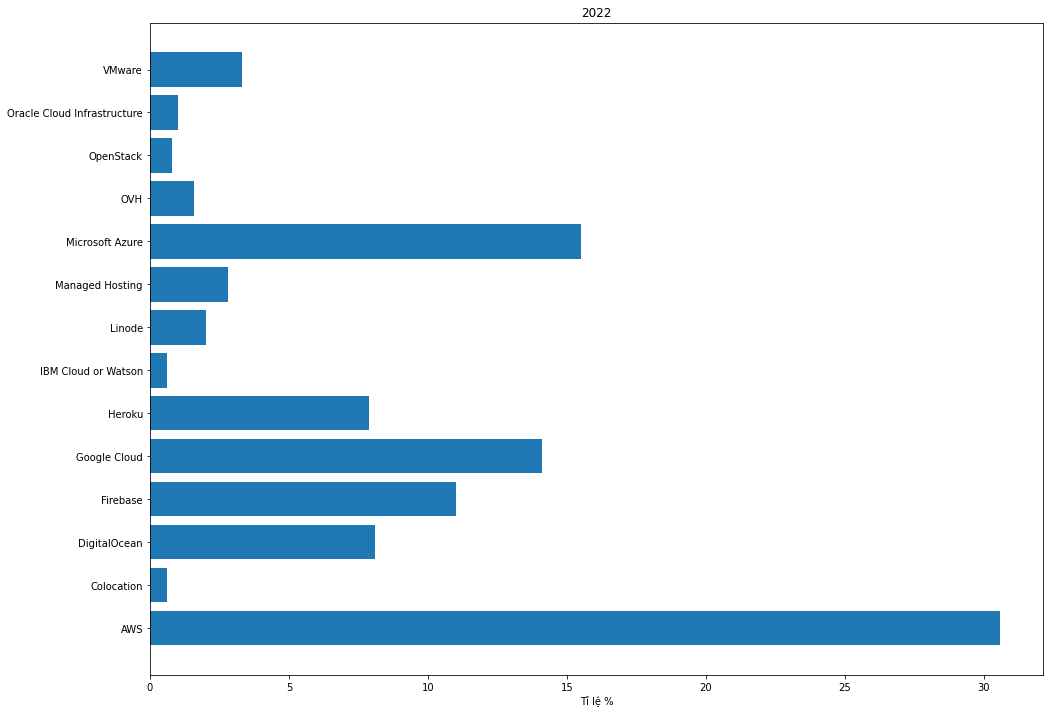

In [233]:
plt.figure(figsize=(16,12))
plt.barh(most_loved_platforms.index, most_loved_platforms.values)
plt.xlabel("Tỉ lệ %")
plt.title("2022")
plt.show()

Có điều gì thay đổi trong hai năm vừa qua, các bạn hãy tìm hiểu bằng cách trực quan với các năm 2020, 2021 nhé!

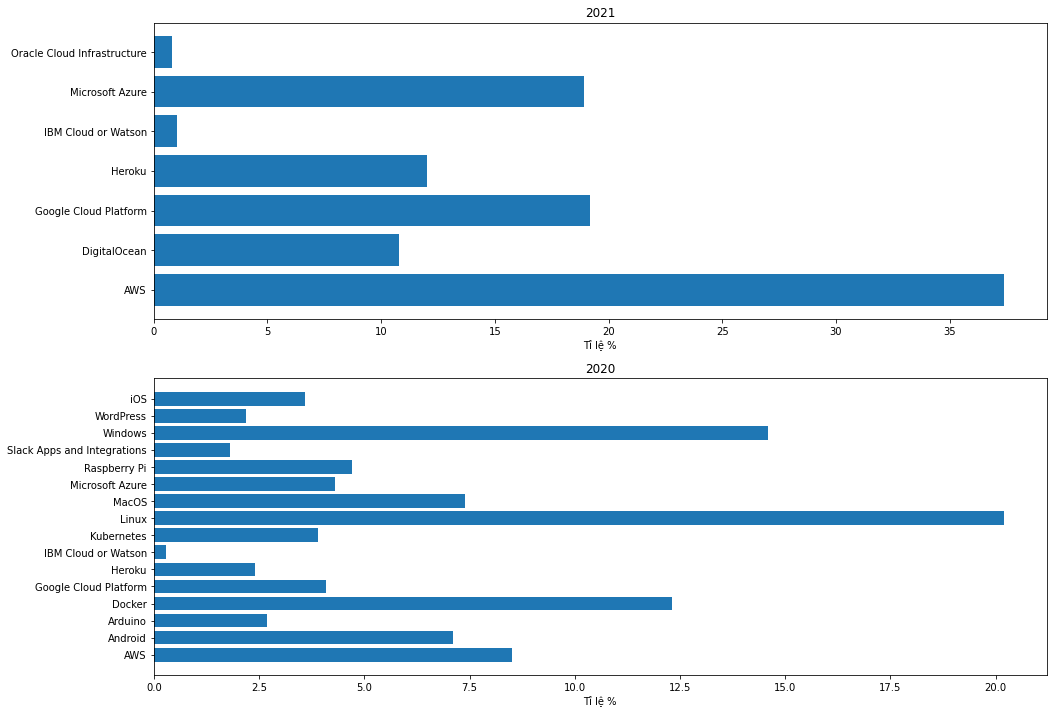

In [234]:
most_loved_platforms_2020=pd.Series(MostUsedEngineData(survey2020_df,ColName_WorkedWith='PlatformWorkedWith',ColName_WantToWor='PlatformDesireNextYear')).sort_index()
most_loved_platforms_2021=pd.Series(MostUsedEngineData(survey2021_df,ColName_WorkedWith='PlatformHaveWorkedWith',ColName_WantToWor='PlatformWantToWorkWith')).sort_index()
plt.figure(figsize=(16,12))
ax1 = plt.subplot(2, 1, 1)
ax1.barh(most_loved_platforms_2021.index, most_loved_platforms_2021.values)
ax1.set_title('2021')
ax1.set_xlabel("Tỉ lệ %")
ax2 = plt.subplot(2, 1, 2)
ax2.barh(most_loved_platforms_2020.index, most_loved_platforms_2020.values)
ax2.set_title('2020')
ax2.set_xlabel("Tỉ lệ %")
plt.show()

## Đặt câu hỏi của bạn - Điểm: (1.5đ)

Bây giờ, đến lượt bạn phải tự suy nghĩ và đưa ra câu hỏi mà có thể trả lời bằng dữ liệu. Ngoài việc đưa ra câu hỏi, bạn cũng phải giải thích để người đọc thấy nếu trả lời được câu hỏi thì sẽ có lợi ích gì. Bạn không nên đưa ra câu hỏi cùng dạng với câu hỏi của mình ở trên.  

YOUR ANSWER HERE

Với các DEV mong muốn một mức lương cao thì các DEV phải đến và làm việc tại đất nước nào? 
- Scrapy tỷ giá (cho nhanh chóng tỉ giá được lưu ở `USDto` cập nhật ngày 2-9-2022)
- Hướng tới các đối tượng có `MainBranch` là `I am a developer by profession` với mức lương không quá 1 triệu đô la Mỹ trên năm (được quy đổi đối hoái), các đất nước có nhiều hơn 500 người khảo sát 

## Tiền xử lý để chuẩn bị dữ liệu cho bước phân tích để trả lời cho câu hỏi của bạn

Phần này là không bắt buộc. 

In [235]:
USDto={np.nan : 0, 'CAD': 1.3609,'USD': 1., 'GBP': 0.8704, 'ILS': 3.5409, 'EUR': 1.0128, 'HRK': 7.6253, 'AUD': 1.5605, 'RUB': 61.55, 'CZK': 24.769, 'PLN': 4.7632, 'NOK': 10.3318, 'TWD': 32.149, 'HKD': 7.8496, 'INR': 82.788, 'BRL': 5.1432, 'UYU': 40.61, 'RSD': 118.57, 'SEK': 11.0182, 'DKK': 7.5383, 'EGP': 24.15, 'TRY': 18.6164, 'RON': 4.9656, 'SGD': 1.413, 'SAR': 3.7575, 'BGN': 1.9803, 'BYN': 2.5191, 'KES': 121.35, 'CHF': 0.9996, 'ZAR': 18.1703, 'ISK': 145.15, 'THB': 37.75, 'CNY': 7.2785, 'VND': 24830.0, 'ARS': 157.27, 'HUF': 411.74, 'TND': 3.2263, 'BDT': 101.85, 'MVR': 15.42, 'CLP': 942.99, 'MXN': 19.7223, 'PKR': 221.0, 'NPR': 132.45, 'IDR': 15650.0, 'UAH': 36.93, 'BAM': 1.9803, 'IMP': 1.7053, 'IRR': 42000.0, 'CRC': 614.125, 'MUR': 44.25, 'KZT': 460.34, 'XOF': 656.25, 'MAD': 10.9527, 'PHP': 58.42, 'AMD': 398.8, 'NZD': 1.7053, 'AED': 3.6727, 'JPY': 147.32, 'PEN': 3.9717, 'COP': 5002.0, 'GIP': 147.32, 'DOP': 53.82, 'AFN': 88.27, 'KRW': 1419.49, 'LBP': 1505.5, 'MYR': 4.738, 'GTQ': 7.81, 'AZN': 1.693, 'LKR': 362.0, 'UZS': 11107.69, 'QAR': 3.64, 'NGN': 434.0, 'MGA': 4255.0, 'ETB': 52.8867, 'MKD': 62.29, 'KHR': 4131.0, 'JOD': 0.708, 'YER': 249.95, 'ANG': 119.13, 'FJD': 2.2604, 'PGK': 3.4305, 'UGX': 3785.0, 'MNT': 3383.0, 'DZD': 139.994, 'TJS': 119.13, 'GHS': 13.5, 'TZS': 2327.0, 'MDL': 19.22, 'XAF': 661.44, 'TMT': 3.49, 'BWP': 13.3869, 'ALL': 119.13, 'MMK': 2093.7, 'GEL': 2.73, 'BHD': 0.3769, 'KWD': 0.3098, 'CVE': 111.64, 'LYD': 4.9874, 'RWF': 1065.04, 'BMD': 1.0, 'BOB': 6.85, 'KYD': 0.825, 'VES': 8.553, 'HNL': 24.6406, 'PYG': 7263.47, 'SYP': 2511.0, 'CUP': 24.0, 'BTN': 82.639, 'BZD': 1.9982, 'JMD': 152.67, 'BBD': 1.9981, 'NIO': 35.99, 'ZMW': 16.185, 'KGS': 476.0, 'IQD': 1458.52, 'BIF': 2036.25, 'LAK': 17352.0, 'MZN': 63.24, 'AOA': 476.0, 'AWG': 1.78, 'OMR': 0.385, 'SDG': 578.5, 'SHP': 0.8365, 'DJF': 177.5, 'SCR': 13.62, 'SZL': 18.181, 'GNF': 8551.0, 'TTD': 6.7301, 'BND': 1.413, 'SLL': 17298.0, 'NAD': 18.181, 'HTG': 127.0, 'MWK': 1014.15, 'GYD': 207.98, 'none': 1.413, 'XPF': 120.51, 'CDF': 2009.0, 'SOS': 565.0, 'XDR': 1.413, 'XCD': 2.7, 'SBD': 1.413, 'JEP': 1.413, 'TOP': 1.413}
toYearly={np.nan : 0, 'Yearly': 1, 'Monthly': 12, 'Weekly': 52}
survey_df__1=(pd.read_csv('./data/2022/survey_results_public.csv',index_col='ResponseId'));
survey_df__1=((survey_df__1.loc[survey_df.index]))

## Phân tích dữ liệu để ra câu trả lời cho câu hỏi của bạn - Điểm: (2đ)

In [236]:

re_={ x:{'CountPeople':0,'CompTotal':0} for x in survey_df__1['Country'].unique()}
dict__1={'MainBranch':survey_df__1['MainBranch'].values, 
         'Country':survey_df__1['Country'].values, 
         'Currency':[x.replace('\t', ' ').split(' ')[0] if str(x)!='nan' else x for x in survey_df__1['Currency'].values],
         'CompTotal':[x if str(x)!='nan' else 0 for x in survey_df__1['CompTotal'].values],'CompFreq':survey_df__1['CompFreq'].values}
for i in range(len(survey_df__1)):
  try:
    CompTotal=dict__1['CompTotal'][i]*toYearly[dict__1['CompFreq'][i]]/USDto[dict__1['Currency'][i]]
  except :
    CompTotal=0
  if CompTotal>0 and CompTotal<1000000 and dict__1['MainBranch'][i]=='I am a developer by profession':
    re_[dict__1['Country'][i]]['CountPeople']+=1;
    re_[dict__1['Country'][i]]['CompTotal']+=CompTotal;
re_.pop(np.nan)
re_=({ x:re_[x]['CompTotal']/re_[x]['CountPeople'] if re_[x]['CountPeople']>500 else 0.0  for x in re_.keys()})

pd.Series(re_).sort_values(ascending=False).head()

United States of America                                160397.892504
United Kingdom of Great Britain and Northern Ireland    128510.894910
Australia                                               111367.070256
Canada                                                  107093.039847
Germany                                                  94217.312966
dtype: float64